<a href="https://colab.research.google.com/github/Glifoyle/test-repo/blob/master/1_%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A_%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%82%AF%E5%9B%9E%E5%B8%B0_v5_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目的：教師あり学習

#### テーマ：ロジスティク回帰分析を用いて，cancerデータの悪性と良性を判別する．

<br>
&copy; 2021-2024 Hiro Kimura
<br>








### ポイント
- 「教師あり学習」の進め方を理解できる
- データセットの作成と分割について理解できる
  - 乱数
  - データ分割
  - スケール変換
- ロジスティック回帰モデルにより2クラス分類が実施できる

### 実習内容
教師あり学習の手順を理解する：

1. データ（Breast cancer wisconsin (diagnostic) dataset）をネット上（またはExcelファイル）から読み込む
1. 再現性を確保するために，**乱数シードを固定**する
1. データセットを**訓練用とテスト用に分離**する
1. データの**スケール変換**を行う（データの正規化・標準化）
1. **ロジスティク回帰分析**で悪性と良性を判別する
  - 訓練用データでモデルを訓練する
  - 学習済みモデルにテスト用データを入力して悪性と良性を予測性能を評価する


# 実習の準備

1. タイムゾーンを東京に変更する
1. Google Driveをマウントする
2. 作業用フォルダを作成する

1. 作業用フォルダにbreastcancer.xlsx の存在を確認する



In [ ]:
# pythonのバージョン確認
# ! python --version

## タイムゾーンを東京に変更する

In [ ]:
# 現在の設定を確認
!date

Mon Apr  8 02:22:48 AM UTC 2024


In [ ]:
# 設定を変更
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime

!date

Mon Apr  8 11:22:58 AM JST 2024


## Google Driveをマウントする


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # # Chap_LR
# # !mkdir -p '/content/drive/MyDrive/practice/chap_LR'
# %cd '/content/drive/MyDrive/practice/chap_LR'
# !pwd

In [ ]:
# Chap_LR のフォルダを作成
import os

chap_dir = "/content/drive/MyDrive/practice/chap_LR"
if not os.path.exists(chap_dir):
    # os.mkdir(chap_dir)
    os.makedirs(chap_dir)

os.chdir(chap_dir)
os.getcwd()

'/content/drive/MyDrive/practice/chap_LR'

In [ ]:
# google driveのフォルダの中身を確認する
# ! pwd
! ls -F


# データセットの準備

## データを読み込む
- ネット上から
  - Breast cancer wisconsin (diagnostic) dataset
- ファイルから
  1. ファイル breastcancer.xlsx をPCにダウンロードしておく
  2. PCからマウントした作業フォルダにアップロードする
  - 読み込めない場合は，breastcancer.csv

In [ ]:
# # ライブラリを読み込む
# from sklearn.datasets import load_breast_cancer

# # データのロード
# cancer_data = load_breast_cancer()

In [ ]:
# pandasとの関係で，必要があればUpdateする

# !pip install -U openpyxl

- ファイル（Breastcancer.xlsx）をアップロードする

In [ ]:
import pandas as pd

# Excelファイルからデータフレームに読み込む
df = pd.read_excel('./breastcancer.xlsx')

print(df.shape)

# 列数が31であることに注意

(569, 31)


In [ ]:
# データフレームを確認する

display(df.head())
# print(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diag class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 説明変数（30個の特徴量）を取り出す
# # 方法1
# df_feature = df.iloc[:,:-1]

# 方法2
# 正解ラベル列（"diag class"列）を削除する
df_feature = df.drop("diag class", axis="columns")

print(df_feature.shape)

(569, 30)


In [ ]:
# 列名を取得する
cols = df_feature.columns
print(cols)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# 正解ラベルをシリーズ（列データ）に取り込む
# t = pd.Series(cancer_data.target)
ser_label = df['diag class']

print(ser_label.shape)

(569,)


In [ ]:
# ライブラリ
import numpy as np

# データフレームをnumpyの配列データ（30次元の特徴量データ）に変換する
features = df_feature.values
print(type(features))
print(len(features))

# 正解ラベルをnumpy配列データに変換する
labels = ser_label.values
print(type(labels))
print(len(labels))

<class 'numpy.ndarray'>
569
<class 'numpy.ndarray'>
569


In [ ]:
# 列名を再確認する
# cols = df_feature.columns
print(cols)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# 30次元の特徴量ベクトルを確認する
print(features[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [ ]:
# 正解ラベルを確認する
print(labels[0])

0


## 訓練用データとテスト用データに分離する
- 訓練用 X_train，y_train，テスト用 X_test，y_test
- 慣用的に，大文字 X はベクトル値を，小文字 y はスカラー値を表す
- データ件数は，訓練用 0.8, テスト用 0.2 とする

In [ ]:
# 乱数シードを設定する
seed = 24
# seed = 1000

In [ ]:
# ライブラリ
from sklearn.model_selection import train_test_split

# データをランダムに分割する（8 : 2）
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2, random_state=seed)

print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## スケール変換する
- 訓練データを元にスケール変換方式を決定し，同じ方式をテストデータにも適用する
  - 標準化：列ごとに平均値を0に，分散を1にする：StandardScaler
  - 正規化：列ごとに最小値を0に，最大値を1にする：MinMaxScaler
  - ロバスト標準化：平均値を中央値に標準偏差をQ3-Q1にした標準化：RobustScaler

In [ ]:
# データを確認する（6桁くらい違う）

print(X_train[0])

[1.757e+01 1.505e+01 1.150e+02 9.551e+02 9.847e-02 1.157e-01 9.875e-02
 7.953e-02 1.739e-01 6.149e-02 6.003e-01 8.225e-01 4.655e+00 6.110e+01
 5.627e-03 3.033e-02 3.407e-02 1.354e-02 1.925e-02 3.742e-03 2.001e+01
 1.952e+01 1.349e+02 1.227e+03 1.255e-01 2.812e-01 2.489e-01 1.456e-01
 2.756e-01 7.919e-02]


In [ ]:
# ライブラリ
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 標準化：各特徴量（列）を平均：0，分散：１にスケーリング
scaler = StandardScaler()

# 正規化：各特徴量（列）を最小値：0，最大値：１にスケーリング
# scaler = MinMaxScaler()

# ロバスト標準化：各特徴量（列）を中央値と4分割値でスケーリング
# scaler = RobustScaler()


In [ ]:
# X_trainを元に変換器（スケーラー）を作成する（訓練する=>列データの平均値と標準偏差を求める）
scaler.fit(X_train)

# 変換器でスケール変換する（平均値を0に標準偏差が1になるように変換する）
X_train_scaled = scaler.transform(X_train) # 変換済み特徴量ベクトルX_train
X_test_scaled = scaler.transform(X_test) # 変換済み特徴量ベクトルX_test

In [ ]:
# スケール変換後のデータを確認する（同じ桁になった）

print(X_train_scaled[0])

[ 0.95760506 -0.99786803  0.92811099  0.84033375  0.16480337  0.21367082
  0.1232652   0.77701626 -0.28380257 -0.16986277  0.72774989 -0.69736431
  0.89729033  0.50381177 -0.48497302  0.27085088  0.08125322  0.28592378
 -0.15090023 -0.01537589  0.77173902 -0.99332682  0.81694     0.6149034
 -0.28934483  0.17144028 -0.10807177  0.46604277 -0.23838727 -0.2578047 ]


# 線形モデル（ロジスティク回帰）で分析する
Scikit-learn [LogisticRegression API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)

## 訓練用データで訓練する
Scikit-Learnでは，初めに**モデルを初期化**する

In [ ]:
# ライブラリ
from sklearn.linear_model import LogisticRegression

# LR法のモデルを初期化する
model_lr = LogisticRegression()


Scikit-Learnでの「訓練」は，アルゴリズムを問わず，**fit()**

In [ ]:
# # スケール変換しない元データを使用する場合（提出課題の設問3では以下の2行のコメントを外す）
# X_train_scaled = X_train
# X_test_scaled = X_test

In [ ]:
# ロジスティク回帰モデルで訓練する
model_lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
# 係数を表示する（各変数の重要度または重み）
coef = model_lr.coef_

print(coef)

[[-0.34640866 -0.39579978 -0.30790234 -0.41794158 -0.15789077  0.17806493
  -0.85287417 -1.08547384  0.01930672  0.17712256 -1.38306733 -0.10751716
  -0.60582053 -0.8947099   0.28776849  0.8246396   0.09083736 -0.21737022
   0.11232976  0.9940864  -0.96473756 -1.22123611 -0.7006928  -0.8807843
  -0.52304974 -0.15407433 -0.932356   -0.90082065 -0.56821416 -0.31765873]]


## テスト用データで推論（予測）する
Scikit-Learnでの「推論（予測）」は，アルゴリズムを問わず，**predict()**

In [ ]:
# 訓練済みモデルにテスト用データを入力して推論する
y_pred= model_lr.predict(X_test_scaled)

print(f'正解ラベル\n {y_test}')
print(f'予測ラベル\n {y_pred}')

正解ラベル
 [1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1
 1 1 0]
予測ラベル
 [1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 0 0]


In [ ]:
# 正解率を計算する
acc = model_lr.score(X_test_scaled, y_test)

print(f'正解率：{acc:.2f}')

正解率：0.96


In [ ]:
# ライブラリ
from sklearn.metrics import confusion_matrix

# 混合行列を表示する
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[38  3]
 [ 2 71]]


### 推論結果をグラフ表示して確認する
- cmapの一覧は[マニュアル](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)で確認する
- markerの一覧は[マニュアル](https://matplotlib.org/3.5.0/api/markers_api.html#module-matplotlib.markers)で確認する


In [ ]:
# ライブラリ
import pandas as pd

# （グラフ表示に便利なので）pandasのデータフレームとシリーズに格納する
df_x_test = pd.DataFrame(X_test_scaled, columns=cols)
se_y_test = pd.Series(y_test)
se_y_pred = pd.Series(y_pred)

# print(df_x_test.head(3)) # テスト用データ
# print(se_y_test.head(3)) # テスト用データの正解ラベル
# print(se_y_pred.head(3)) # テスト用データの予測結果

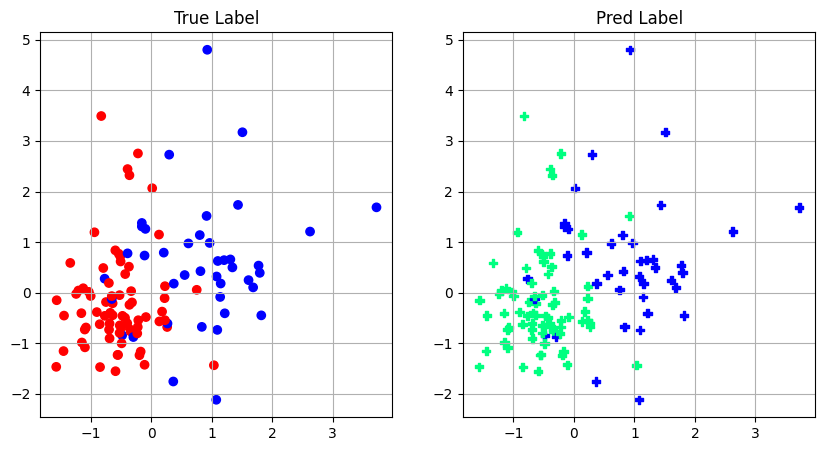

In [ ]:
# ライブラリ
import matplotlib.pyplot as plt

# 図の大きさをインチ単位で指定する
fig = plt.figure(figsize=(10, 5))

# フィギュア内にサブプットを2つ配置する
ax1 = fig.add_subplot(121) # 1行2列の1番目
ax2 = fig.add_subplot(122) # 1行2列の2番目

# グラフ1: 正解を表示する
ax1.set_title('True Label')
# Testデータの散布図をプロットする
ax1.scatter(df_x_test['mean radius'], df_x_test['mean texture'], c=se_y_test, marker='o', cmap='bwr')

# グリッド表示
ax1.grid(axis="both")

# グラフ2: 予測値を表示する
ax2.set_title('Pred Label')

# Testデータの散布図をプロットする
ax2.scatter(df_x_test['mean radius'], df_x_test['mean texture'], c=se_y_pred, marker='P', cmap='winter')
# ax2.scatter(df_x_test['mean radius'], df_x_test['mean texture'], c=se_y_pred, marker='P', cmap='bwr')

# グリッド表示
ax2.grid(axis="both")

# グラフをカレントディレクトリにPDFファイルとして保存する
# plt.savefig("./Logistic_Regression_breast_cancer.pdf")
# plt.savefig("./Logistic_Regression_breast_cancer.jpg")
# plt.savefig("./Logistic_Regression_breast_cancer.png")

plt.show()

### [演習]
- マニュアルを参考にしながら，上記のグラフのマーカや色を変えてみる
  - marker='o', marker="X", marker="D", marker="d", marker="P", marker="s"
  - cmap='bwr', cmp="rainbow", cmap="gist_rainbow", cmap="jet", cmap="PiYG"

# [提出課題]
データ分割で用いた関数（train_test_split）では，乱数を用いている．
この際，乱数のシードを，random_state=seed で指定することにより，データ分割の再現性を確保している．

乱数シード（seed）の値を変えることで，異なる数値系列をランダムに生成することができるので，異なるデータ分割を実現することができる．

設問1（乱数シードの変更）：
1. **seed = 1000** に変更する
1. 以降のセル（データ分割）を最後のセルまで再度実行する
1. 結果の違いを確認する
  - 訓練データの違い，例えば，print(X_train[0])の値の違い
  - 正解率や混同行列，グラフ表示等
1. テスト用データでの正解率（小数第二位まで）を，確認クイズで回答せよ

設問2（スケーラーの変更）：
1. **seed = 1001** に変更する
1. 以降のセル（データ分割）を最後のセルまで再度実行する
1. この際，**MiniMaxScaler()**を使用する
1. 結果の違いを確認する
  - 訓練データの違い，例えば，print(X_train[0])の値の違い
  - 正解率や混同行列，グラフ表示等
1. テスト用データでの正解率（小数第二位まで）を，確認クイズで回答せよ

<!--
設問3（スケール変換を行わない）：
1. **seed = 1002** に変更する
1. 以降のセル（データ分割）を最後のセルまで再度実行する
1. この際，MiniMaxScaler()を使用する（実際には 4.により使用されない）
1. 「訓練」の最初のセル（以下）の**コメントを外して**実行する
    ```
    # # スケール変換しない元データを使用する場合
    # X_train_scaled = X_train
    # X_test_scaled = X_test
    ```
1. 結果の違いを確認する
  - 訓練データの違い，例えば，print(X_train[0])の値の違い
  - 正解率や混同行列，グラフ表示等
1. テスト用データでの正解率（小数第二位まで）を，確認クイズで回答せよ
-->

# まとめ
- ロジスティク回帰モデルを用いて，教師あり学習を行い，breastcancerデータのがんの悪性と良性を予測した．
  - 97%以上の高精度で，breastcancerデータのがんの悪性と良性を予測できた

- 教師あり学習の手順が理解できた
- 教師あり学習のデータの分割の重要性が理解できた
  - 訓練データとテストデータの分離
  - 訓練データはモデル学習のため
  - テストデータは，未知のデータの代用として，モデル性能確認のため
- データ分割した場合のスケール変換の仕方が理解できた
- scikit-learnの教師あり学習のメソッドの使い方が理解できた
  1. モデルオブジェクトの定義：**model**
  1. モデルの訓練：**model.fit(訓練データ，正解ラベル)**
  1. モデルによる予測：**model.predict(テストデータ)**
  1. モデル性能の評価：**model.score(テストデータ，正解ラベル)**
  1. 混同行列による評価：**confusion_matrix(正解ラベル, 予測ラベル)**
- 乱数シードの使い方が理解できた